<a href="https://colab.research.google.com/github/lexmar07/lexmar07/blob/main/timss_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The code provided is the source code associated with the paper 'From Top to Bottom: Ability Distribution and Dynamics of Wage Inequality' by Kirill Borissov, Aleksey Minabutdinov, and Roman Popov.

In [ ]:
# Importing essential libraries

# For numerical operations
import numpy as np

# For data manipulation and analysis
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt

The data used in our study were obtained from the 2019 Wave of Trends in International Mathematics and Science Study (TIMSS). TIMSS is a series of international assessments of students' mathematics and science knowledge worldwide. TIMSS 2019 is the most recent in the TIMSS trend series, which began with the first assessments in 1995 and continued every four years. TIMSS assesses students in participating countries in their fourth year of formal schooling, provided the mean age at the time of testing is at least 9.5 years, and in their eighth year of formal schooling, provided the mean age at the time of testing is 13.5 years.  The participating students come from diverse educational systems (countries or regional jurisdictions of countries) in terms of economic development, geographical location, and population size. The basic TIMSS sample design consists of at least 150 schools and one or more intact classes per grade for a student sample of approximately 4,000 students in each country. The data for each student comprise the resulting TIMSS-test score, an integer value distributed between $300$ and $800$. We focus on the results in mathematics of fourth grade in two advanced countries: England and the US.

In [ ]:
# Define the file paths
filename_eng = '../timss19_eng.csv'
filename_usa = '../timss19_usa.csv'

# Read the English dataset and reshape it into a 1D array
df_swing_eng = pd.read_csv(filename_eng, header=None)
data_eng = df_swing_eng.values.reshape(-1)

# Read the USA dataset and reshape it into a 1D array
df_swing_usa = pd.read_csv(filename_usa, header=None)
data_usa = df_swing_usa.values.reshape(-1)

                  0
count  16967.000000
mean     555.002652
std       85.901540
min      300.000000
25%      497.000000
50%      557.000000
75%      615.000000
max      797.000000


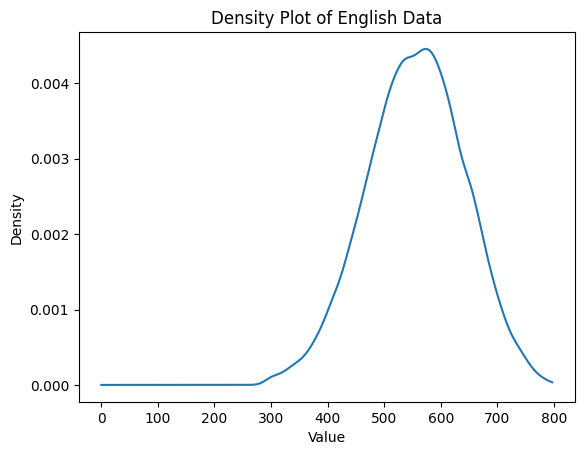

In [ ]:
# Convert the reshaped English data into a DataFrame
df_eng = pd.DataFrame(data_eng)

# Display statistical summary of the English data
print(df_eng.describe())

# Importing gaussian_kde for smoothed density estimation
from scipy.stats import gaussian_kde

# Calculate the density of the English data using Gaussian kernel density estimator
density = gaussian_kde(data_eng)

# Parameters for adjusting the visualization
left_indent_parameter = 0.01
right_indent_parameter = 0.99
xlim_eng = df_eng.max()[0]  # Maximum value in the English data
renormalization = 1  # Factor to adjust the y-values of the density plot
band = 3

# Define grid parameters for plotting
j_grid_num_points = 1000
x_grid_num_points = 1000
x_grid_eng = np.linspace(0, xlim_eng, x_grid_num_points)

# Evaluate the density on the grid
y = density(x_grid_eng)

# Plot the density of the English data
plt.plot(x_grid_eng, y/renormalization)
plt.title("Density Plot of English Data")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()


                  0
count  43878.000000
mean     533.348990
std       85.008856
min      300.000000
25%      477.000000
50%      539.000000
75%      594.000000
max      798.000000


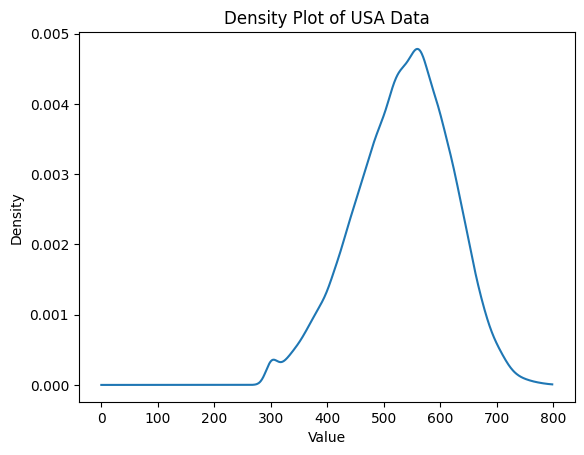

In [ ]:
# Convert the reshaped USA data into a DataFrame
df_usa = pd.DataFrame(data_usa)

# Display statistical summary of the USA data
print(df_usa.describe())

# Importing gaussian_kde for smoothed density estimation (if not imported earlier)
from scipy.stats import gaussian_kde

# Calculate the density of the USA data using Gaussian kernel density estimator
density = gaussian_kde(data_usa)

# Parameters for adjusting the visualization
left_indent_parameter = 0.01
right_indent_parameter = 0.99
xlim_usa = df_usa.max()[0]  # Maximum value in the USA data
renormalization = 1  # Factor to adjust the y-values of the density plot
band = 3

# Define grid parameters for plotting
j_grid_num_points = 1000
x_grid_num_points = 1000
x_grid_usa = np.linspace(0, xlim_usa, x_grid_num_points)

# Evaluate the density on the grid
y = density(x_grid_usa)

# Plot the density of the USA data
plt.plot(x_grid_usa, y/renormalization)
plt.title("Density Plot of USA Data")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()


In [ ]:
# Importing necessary libraries and modules for KDE
from statsmodels.nonparametric.kde import KDEUnivariate
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
import scipy.stats.distributions as distr

def kde_scipy_gaussian(x, x_grid, bandwidth=0.2, **kwargs):
    """
    Kernel Density Estimation with Scipy using Gaussian kernel.
    """
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return kde.evaluate(x_grid), kde

def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """
    Kernel Density Estimation with Scikit-learn using Gaussian kernel.
    """
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(np.array(x)[:, np.newaxis])
    log_pdf = kde_skl.score_samples(np.array(x_grid)[:, np.newaxis])
    return np.exp(log_pdf), kde_skl

def kde_sklearn_exp_kern(x, x_grid, bandwidth=0.2, **kwargs):
    """
    Kernel Density Estimation with Scikit-learn using Exponential kernel.
    """
    kde_skl = KernelDensity(bandwidth=bandwidth, kernel='exponential', **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf), kde_skl

def kde_statsmodels_u(x, x_grid, bandwidth=0.2, **kwargs):
    """
    Univariate Kernel Density Estimation with Statsmodels.
    """
    kde = KDEUnivariate(x)
    kde.fit(bw=bandwidth, **kwargs)
    return kde.evaluate(x_grid), kde


In [ ]:
# Convert the reshaped English data into a pandas Series
raw_data_eng = pd.Series(data_eng)

# Determine the upper and lower quantiles for the English data
raw_data_upper_quantile_eng = raw_data_eng.quantile(1)  # This is essentially the maximum value
raw_data_lower_quantile_eng = raw_data_eng.quantile(0.001)

# Filter out extreme values from the English data based on quantiles
x_eng = raw_data_eng[(raw_data_eng > raw_data_lower_quantile_eng) &
                     (raw_data_eng < raw_data_upper_quantile_eng)]

# Convert the reshaped USA data into a pandas Series
raw_data_usa = pd.Series(data_usa)

# Determine the upper and lower quantiles for the USA data
raw_data_upper_quantile_usa = raw_data_usa.quantile(1)  # This is essentially the maximum value
raw_data_lower_quantile_usa = raw_data_usa.quantile(0.001)

# Filter out extreme values from the USA data based on quantiles
x_usa = raw_data_usa[(raw_data_usa > raw_data_lower_quantile_usa) &
                     (raw_data_usa < raw_data_upper_quantile_usa)]


Visual inspection of the data shows that the score distribution for these countries is close to bell-shaped.

<Figure size 1920x1440 with 0 Axes>

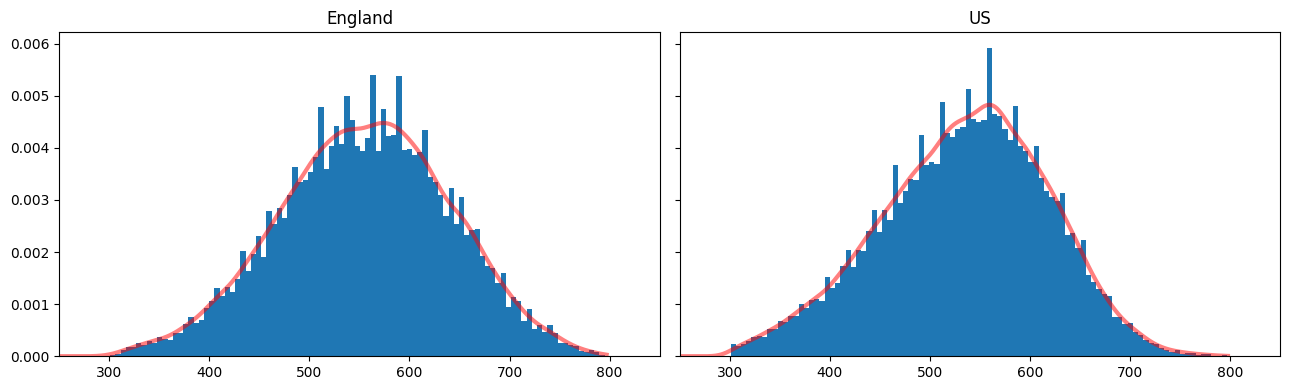

In [ ]:
# List of dataset names
names = ['England', 'US']

# Data and grid values for both datasets
xx = [x_eng, x_usa]
x_grids = [x_grid_eng, x_grid_usa]

# Maximum x-axis limits for both datasets
xlims = [xlim_eng, xlim_usa]

# Bandwidths for KDE for both datasets calculated by the Silverman rule
bands = [1.0 * 80 * 17000**(-0.2), 1.0 * 80 * 43000**(-0.2)]

# Create a figure with high resolution
plt.figure(dpi=300)

# Create subplots for both datasets
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(13, 4))

# Loop over both datasets to plot KDE and histograms
for i in range(2):
    # Compute KDE using Scikit-learn
    pdf = kde_sklearn(xx[i], x_grids[i], bandwidth=bands[i])[0]

    # Plot KDE
    ax[i].plot(x_grids[i], pdf, color='red', alpha=0.5, lw=3)

    # Plot histogram
    ax[i].hist(xx[i], bins=95, density=True)

    # Set title and x-axis limits for the plot
    ax[i].set_title(names[i])
    ax[i].set_xlim(250, 850)

# Display the plots
plt.tight_layout()
plt.show()


Furthermore, using estimated density, we evaluate the skill premium function $\hat{S}(s)$ and explore them graphically.  The results demonstrate that for both countries the function $\hat{S}(s)$ is increasing. Hence, it is derived from Lemma 1 and formulas that define functions $S(s)$ and $G(s)$ that, with the empirical score distribution as a proxy for the ability distribution, it holds that $S'(s)>0$ and $G'(s)>0$.

In [ ]:
from scipy.special import ndtr

def T(j, CDF, x_grid):
    """
    Compute the upper quantile function of abilities.

    Parameters:
    - j: Quantile level.
    - CDF: Cumulative distribution function values.
    - x_grid: Grid over which the CDF is evaluated.

    Returns:
    - Value of the quantile function at level j.
    - Index corresponding to the quantile function value.
    """
    index = np.searchsorted(CDF, 1 - j) - 1
    if index == -1:
        index = 0
    return x_grid[index], index

def f(index, CDF, XPDF):

    return - (1 - CDF[index]) / XPDF[index]

def f_T(j, CDF, XPDF, x_grid):

    index = T(j, CDF, x_grid)[1]
    return f(index, CDF, XPDF)


In [ ]:
# Calculate the range for x based on the indent parameters and the number of grid points
rng_x = np.arange(int(x_grid_num_points * left_indent_parameter),
                  int(x_grid_num_points * right_indent_parameter))

# Calculate the starting and ending indices for the j range based on the indent parameters
ind_j1 = int(x_grid_num_points * (1 - right_indent_parameter))
ind_j2 = int(x_grid_num_points * (1 - left_indent_parameter))

# Set up the range for j based on the calculated indices
rng_j = np.arange(ind_j1, ind_j2)

# Create a linear space for j grid
j_grid = np.linspace(0, 1, j_grid_num_points)


In [ ]:
from scipy.interpolate import interp1d

def simpsonint1(input_var, output_var, a, b, n=600):
    """
    Approximate the integral of a function using Simpson's rule.

    Parameters:
    - input_var: x-values of the function.
    - output_var: y-values of the function.
    - a, b: Integration limits.
    - n: Number of intervals (default is 600). Must be even.

    Returns:
    - Approximated integral value.
    """
    # Create an interpolation function
    f2 = interp1d(input_var, output_var, kind='cubic')

    h = (b-a) / n
    m = n / 2
    sumval = 0

    if n % 2 == 0:
        for i in range(1, int(m-1)):
            x = a + 2 * i * h
            sumval += 2 * f2(x)
        for i in range(1, int(m)):
            x = a + (2 * i - 1) * h
            sumval += 4 * f2(x)
        sumval = h * (sumval + f2(a) + f2(b)) / 3
    else:
        print("Simpson’s rule requires n to be even.")

    return sumval

def RunningIntegral(x, y, ind1, ind2, n=600):
    """
    Compute the running integral of a function over a range.

    Parameters:
    - x, y: x and y values of the function.
    - ind1, ind2: Index range over which to compute the running integral.
    - n: Number of intervals for Simpson's rule (default is 600).

    Returns:
    - Array of running integral values.
    """
    running_integral = []
    for j in range(len(x)):
        if ind1 <= j < ind2:
            running_integral.append(simpsonint1(x, y, x[ind1], x[j], n=n))
    return np.array(running_integral)

def RunningDerivative(x, y, ind1, ind2):
    """
    Compute the running derivative of a function over a range.

    Parameters:
    - x, y: x and y values of the function.
    - ind1, ind2: Index range over which to compute the running derivative.

    Returns:
    - Array of running derivative values.
    """
    running_derivative = [0]
    for i in range(len(x)):
        if ind1 < i < ind2:
            running_derivative.append((y[i] - y[i-1]) / (x[i] - x[i-1]))
    running_derivative = np.array(running_derivative)
    running_derivative[0] = running_derivative[1]
    return running_derivative


/var/folders/j4/dwnchm5s43xgv9xcyv74thch0000gn/T/ipykernel_44569/2385774221.py:11: RuntimeWarning: divide by zero encountered in divide
  f_array_eng = - (1 - cdf_eng) / xpdf_eng
/var/folders/j4/dwnchm5s43xgv9xcyv74thch0000gn/T/ipykernel_44569/368343296.py:23: RuntimeWarning: divide by zero encountered in scalar divide
  return - (1 - CDF[index]) / XPDF[index]


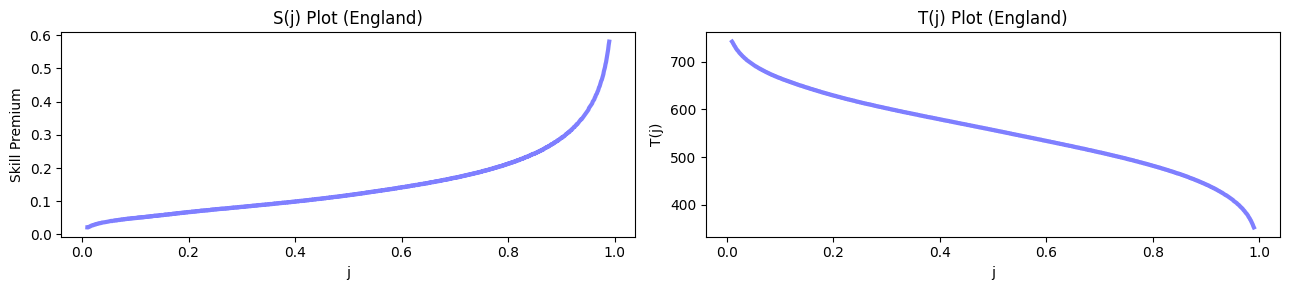

In [ ]:
# Compute KDE estimate of the PDF for the English dataset
pdf_eng, kde_eng = kde_scipy_gaussian(x_eng, x_grid_eng, bandwidth=bands[0])

# Compute the x-weighted PDF
xpdf_eng = np.array([pdf_eng[j] * x_grid_eng[j] for j in range(len(pdf_eng))])

# Compute the CDF using the KDE
cdf_eng = np.array([kde_eng.integrate_box_1d(0, z) for z in x_grid_eng])

# Compute the f array for the English dataset
f_array_eng = - (1 - cdf_eng) / xpdf_eng

# Compute the T values for the j grid
T_j_grid_eng = np.array([T(jj, cdf_eng, x_grid_eng)[0] for jj in j_grid])

# Compute the f_T values for the j grid
f_T_array_eng = np.array([f_T(jj, cdf_eng, xpdf_eng, x_grids[0]) for jj in j_grid])

# Compute the running integral H for the j grid
H_j_grid_eng = RunningIntegral(j_grid, T_j_grid_eng, ind_j1, ind_j2) + simpsonint1(j_grid, T_j_grid_eng, 0, j_grid[ind_j1])

def elast(x, f, F, ind1, ind2):
    """
    Numerically compute the elasticity of F, where F' = f.

    Parameters:
    - x: x-values.
    - f: Derivative values.
    - F: Function values.
    - ind1, ind2: Index range for computation.

    Returns:
    - Array of elasticity values.
    """
    elast_array = [f[j] * x[j] / F[j] for j in range(len(x)) if ind1 < j < ind2]
    return np.array(elast_array)

# Compute the elasticity for the j grid
elast_H_j_grid_eng = elast(j_grid[rng_j], T_j_grid_eng[rng_j], H_j_grid_eng, -1, len(rng_j))

# Plot the computed values
fig2, ax2 = plt.subplots(1, 2, figsize=(13, 3))
ax2[0].plot(j_grid[rng_j], 1 / elast_H_j_grid_eng - 1, color='blue', alpha=0.5, lw=3)
ax2[0].set_title("S(j) Plot (England)")
ax2[0].set_xlabel("j")
ax2[0].set_ylabel("Skill Premium")

ax2[1].plot(j_grid[rng_j], T_j_grid_eng[rng_j], color='blue', alpha=0.5, lw=3)
ax2[1].set_title("T(j) Plot (England)")
ax2[1].set_xlabel("j")
ax2[1].set_ylabel("T(j)")

plt.tight_layout()
plt.show()


/var/folders/j4/dwnchm5s43xgv9xcyv74thch0000gn/T/ipykernel_44569/2645144956.py:11: RuntimeWarning: divide by zero encountered in divide
  f_array_usa = - (1 - cdf_usa) / xpdf_usa
/var/folders/j4/dwnchm5s43xgv9xcyv74thch0000gn/T/ipykernel_44569/368343296.py:23: RuntimeWarning: divide by zero encountered in scalar divide
  return - (1 - CDF[index]) / XPDF[index]


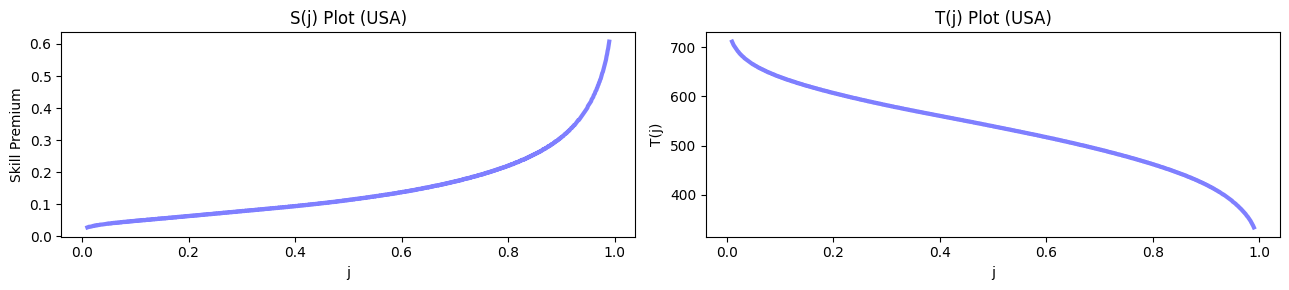

In [ ]:
# Compute KDE estimate of the PDF for the USA dataset
pdf_usa, kde_usa = kde_scipy_gaussian(x_usa, x_grid_usa, bandwidth=bands[0])

# Compute the x-weighted PDF
xpdf_usa = np.array([pdf_usa[j] * x_grid_usa[j] for j in range(len(pdf_usa))])

# Compute the CDF using the KDE
cdf_usa = np.array([kde_usa.integrate_box_1d(0, z) for z in x_grid_usa])

# Compute the f array for the USA dataset
f_array_usa = - (1 - cdf_usa) / xpdf_usa

# Compute the T values for the j grid
T_j_grid_usa = np.array([T(jj, cdf_usa, x_grid_usa)[0] for jj in j_grid])

# Compute the f_T values for the j grid
f_T_array_usa = np.array([f_T(jj, cdf_usa, xpdf_usa, x_grids[0]) for jj in j_grid])

# Compute the running integral H for the j grid
H_j_grid_usa = RunningIntegral(j_grid, T_j_grid_usa, ind_j1, ind_j2) + simpsonint1(j_grid, T_j_grid_usa, 0, j_grid[ind_j1])

# Compute the elasticity for the j grid
elast_H_j_grid_usa = elast(j_grid[rng_j], T_j_grid_usa[rng_j], H_j_grid_usa, -1, len(rng_j))

# Plot the computed values
fig2, ax2 = plt.subplots(1, 2, figsize=(13, 3))
ax2[0].plot(j_grid[rng_j], 1 / elast_H_j_grid_usa - 1, color='blue', alpha=0.5, lw=3)
ax2[0].set_title("S(j) Plot (USA)")
ax2[0].set_xlabel("j")
ax2[0].set_ylabel("Skill Premium")

ax2[1].plot(j_grid[rng_j], T_j_grid_usa[rng_j], color='blue', alpha=0.5, lw=3)
ax2[1].set_title("T(j) Plot (USA)")
ax2[1].set_xlabel("j")
ax2[1].set_ylabel("T(j)")

plt.tight_layout()
plt.show()


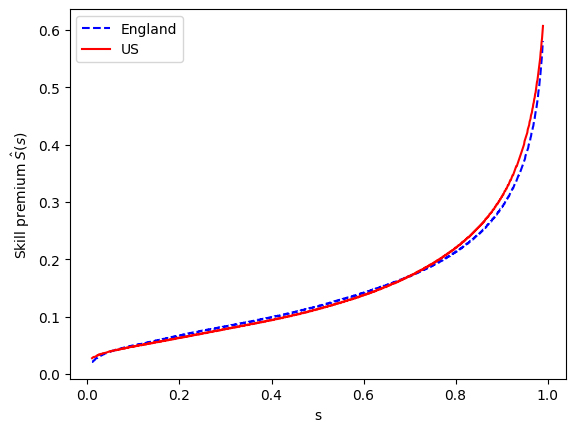

In [ ]:
# Set up a figure with a specified resolution
plt.figure(dpi=100)

# Plot the estimated skill premium for England (dashed blue line)
plt.plot(j_grid[rng_j], 1/(elast_H_j_grid_eng) - 1, color='blue', linestyle='dashed', label='England')

# Plot the estimated skill premium for the US (solid red line)
plt.plot(j_grid[rng_j], 1/(elast_H_j_grid_usa) - 1, color='red', label='US')

# Set the x and y axis labels
plt.xlabel('s')
plt.ylabel('Skill premium $\hat{S}(s)$')

# Display the legend in the upper left corner
plt.legend(loc='upper left')

# Display the plot
plt.show()


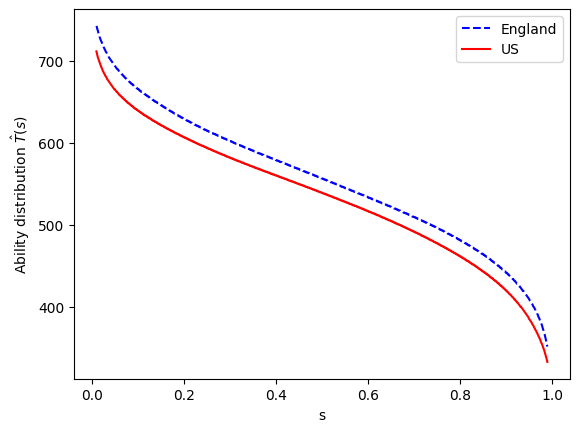

In [ ]:
# Set up a figure with a specified resolution
plt.figure(dpi=100)

# Plot the estimated ability distribution for England (dashed blue line)
plt.plot(j_grid[rng_j], T_j_grid_eng[rng_j], color='blue', linestyle='dashed', label='England')

# Plot the estimated ability distribution for the US (solid red line)
plt.plot(j_grid[rng_j], T_j_grid_usa[rng_j], color='red', label='US')

# Set the x and y axis labels
plt.xlabel('s')
plt.ylabel('Ability distribution $\hat{T}(s)$')

# Display the legend in the upper right corner
plt.legend(loc='upper right')

# Display the plot
plt.show()
